In [1]:
import polars as pl
import matplotlib.pyplot as plt

# Spawn DB Get Tasks

In [9]:
df = pl.read_csv("spawn-db-gets.csv").with_columns((pl.col("num_task") / pl.col("total_secs")).alias("ops/sec"))
df

mode,task_size,concurrency,num_task,total_secs,mean_latency_secs,ops/sec
str,i64,i64,i64,f64,f64,f64
"""Inline""",1,1,1000000,7.21683,0.000007,138564.99819
"""Spawn""",1,1,1000000,27.359246,0.000027,36550.715301
"""SpawnSnapshot""",1,1,1000000,25.937678,0.000026,38553.952746
"""Spawn""",1,2,1000000,15.653371,0.000031,63884.003988
"""SpawnSnapshot""",1,2,1000000,16.46218,0.000033,60745.296815
…,…,…,…,…,…,…
"""SpawnSnapshot""",15,4,66666,2.808342,0.000168,23738.563937
"""Spawn""",15,8,66666,1.637847,0.000196,40703.445883
"""SpawnSnapshot""",15,8,66666,2.136342,0.000256,31205.677144


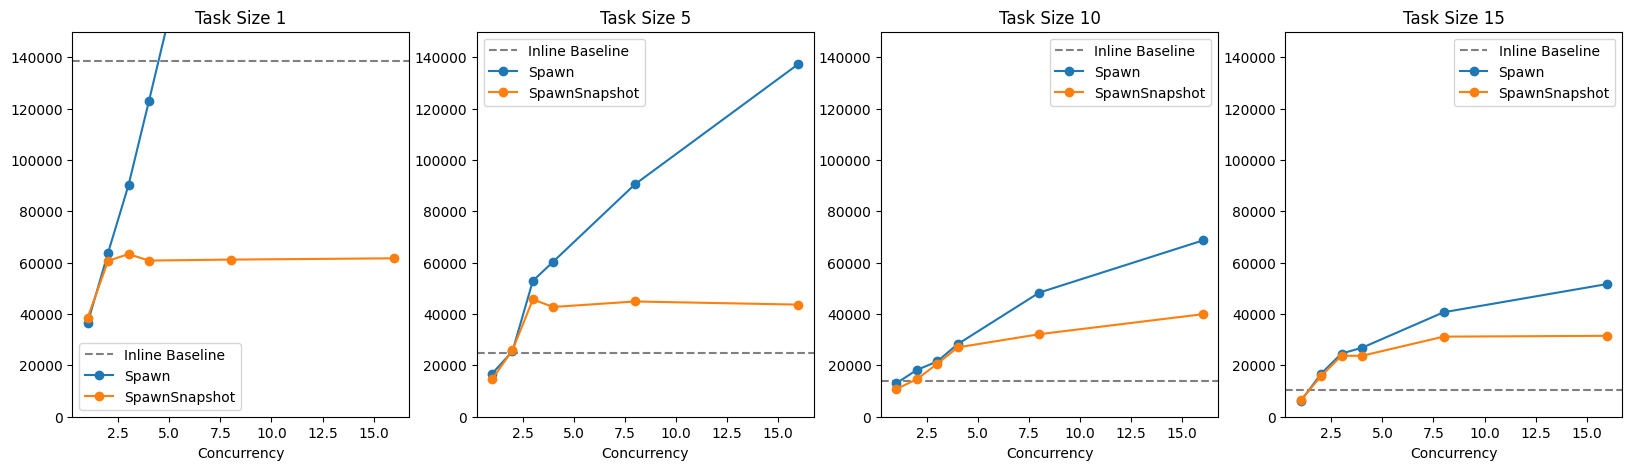

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for ax, task_size in zip(axs, [1, 5, 10, 15]):
    plot_df = df.filter(pl.col("task_size") == task_size)
    baseline = plot_df.filter(pl.col("mode") == "Inline")["ops/sec"][0]
    ax.axhline(y=baseline, color='gray', linestyle='--', label='Inline Baseline')
    for mode in ["Spawn", "SpawnSnapshot"]:
        mode_df = plot_df.filter(pl.col("mode") == mode)
        ax.plot(mode_df["concurrency"], mode_df["ops/sec"], label=mode, marker='o')
    ax.set_title(f"Task Size {task_size}")
    ax.set_xlabel("Concurrency")
    ax.set_ylim(0, 150_000)
    ax.legend()


In [28]:
from math import *
log(100_000, 16), log(1_000_000, 16)

(4.152410118609203, 4.9828921423310435)